In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
path = kagglehub.dataset_download('abhi8923shriv/sentiment-analysis-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'sentiment-analysis-dataset' dataset.
Data source import complete.


# Sentiment Analysis on Kaggle sentiment analysis dataset
sentiment analysis tasks on kaggle sentiment analysis dataset using simple machine learning model: Naive bayes


## Including needed libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# --------------- HELPING LIBRARIES ----------------
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ------------- Pytorch Librairies ---------------
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
import torch.optim as optim


from torch.optim import AdamW

from tqdm import tqdm



from datasets import Dataset
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer
)

from peft import LoraConfig, get_peft_model, TaskType
from sklearn.metrics import accuracy_score, f1_score


## Uploading Data

In [ ]:
train_dataset = path+'/train.csv'
test_dataset = path+'/test.csv'

# Check if the path exists
print (os.path.exists(train_dataset))
print (os.path.exists(test_dataset))

True
True


In [ ]:
# Load the CSV file into a DataFrame
train_df = pd.read_csv(train_dataset, encoding='ISO-8859-1')
test_df = pd.read_csv(test_dataset, encoding='ISO-8859-1')

In [ ]:
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


## Data Preprocessing

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


#### Handling null values

In [ ]:
train_df.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
train_df = train_df.dropna()
train_df.isnull().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
test_df.isnull().sum()

,0
textID,1281
text,1281
sentiment,1281
Time of Tweet,1281
Age of User,1281
Country,1281
Population -2020,1281
Land Area (Km²),1281
Density (P/Km²),1281


In [ ]:
test_df = test_df.dropna()
test_df.isnull().sum()

,0
textID,0
text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


/tmp/ipython-input-1003637143.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


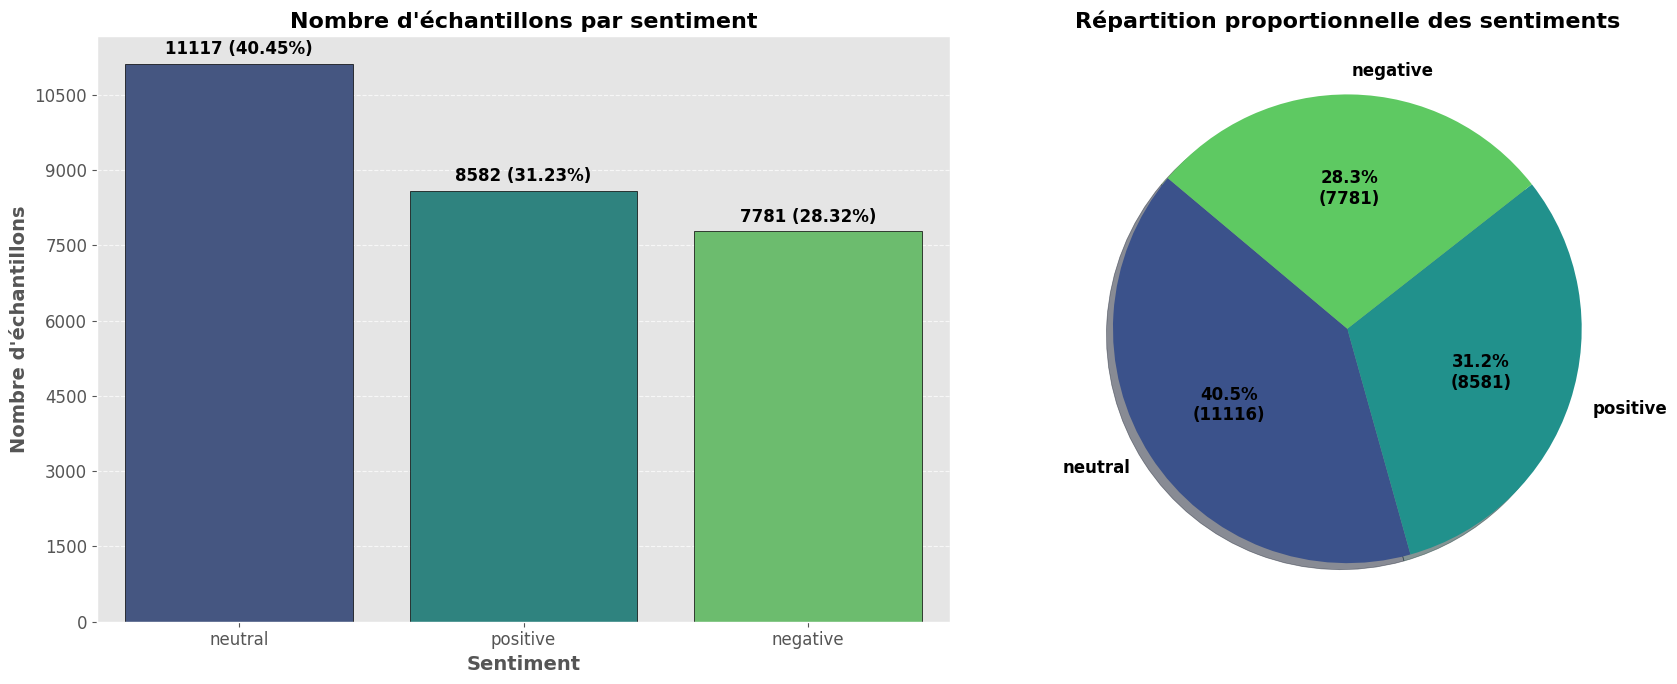

,Nombre,Pourcentage (%)
sentiment,,
neutral,11117,40.45
positive,8582,31.23
negative,7781,28.32


In [ ]:
# -----------------------------
# Visualisation complète de la distribution des sentiments
# -----------------------------

# Configuration générale
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,7)
plt.rcParams['font.size'] = 12

# Calcul des fréquences et pourcentages
sentiment_counts = train_df['sentiment'].value_counts()
sentiment_percent = round(100 * sentiment_counts / sentiment_counts.sum(), 2)

# Palette de couleurs vives
palette = sns.color_palette("viridis", len(sentiment_counts))

# Création d'une figure avec 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))

# --- Bar plot enrichi ---
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=palette,
    edgecolor='black',
    ax=ax1
)

# Annotations sur les barres
for i, (count, percent) in enumerate(zip(sentiment_counts.values, sentiment_percent.values)):
    ax1.text(i, count + max(sentiment_counts.values)*0.01, f'{count} ({percent}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=12)

# Titres et labels
ax1.set_title("Nombre d'échantillons par sentiment", fontsize=16, fontweight='bold')
ax1.set_xlabel("Sentiment", fontsize=14, fontweight='bold')
ax1.set_ylabel("Nombre d'échantillons", fontsize=14, fontweight='bold')
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- Pie chart enrichi ---
ax2.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sentiment_counts.values)/100)})',
    startangle=140,
    colors=palette,
    shadow=True,
    textprops={'fontsize':12, 'fontweight':'bold'}
)
ax2.set_title("Répartition proportionnelle des sentiments", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# --- Tableau résumé ---
summary = pd.DataFrame({
    'Nombre': sentiment_counts,
    'Pourcentage (%)': sentiment_percent
})
display(summary)


#### Removing stopwords & lowercase all text

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Text preprocessing function that removes stopwords and convert text to lowercase

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text



In [ ]:
# Apply preprocessing on train dataset
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),processed_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,"i`d responded, going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,sooo sad miss san diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,boss bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,interview! leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,"sons ****, couldn`t put releases already bought"


In [ ]:
# Apply preprocessing on test dataset
test_df['processed_text'] = test_df['text'].apply(preprocess_text)
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),processed_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day http://twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also really exciting (precisely -- sk...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,"recession hit veronique branquinho, quit compa..."
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,http://twitpic.com/4w75p - like it!!


## Check Imbalancing

In [ ]:
# 1. Transform sentiment into 3 classes
# Example mapping: positive -> 2, neutral -> 1, negative -> 0
sentiment_mapping = {"positive": 2, "neutral": 1, "negative": 0}
train_df["sentiment_class"] = train_df["sentiment"].map(sentiment_mapping)
test_df["sentiment_class"] = test_df["sentiment"].map(sentiment_mapping)

# 2. Extract all the values from the 'processed_text' column into a list
trainval_x = train_df["processed_text"].tolist()
trainval_y = train_df["sentiment_class"].tolist()

train_x, val_x, train_y, val_y = train_test_split(trainval_x, trainval_y, test_size=0.25, random_state=42)

test_x = test_df["processed_text"].tolist()
test_y = test_df["sentiment_class"].tolist()

In [ ]:
print(len(trainval_x),len(val_x),len(test_x))

27480 6870 3534


## Questions

**q0/  please analyse the dataset with differents classical machine learning model**

**q1/  please perform a classification with differents classical machine learning model and analyse the performences**

**q2/  please perform a classification with a MLP?**

**q3/  please analyse all the performences and explain which is the best**

**q4/  please use an LLM compare your performences to a LLM**

**q5/  please explain why I choose a BERT embedding instead of the raw text**

**q6/  please read the BERT paper and explain the BERT architecture**

**q7/  please finetue with LORA an LLM to classify the sentiment (optional)**

********************************************************************************

**Q0/** On va essayer une vectorisation simple du texte countvectorizer (compte les mots) et tfidfvectorizer (mesure importance des mots)
et les modeles :
Naive Bayes,
Logistic Regression,
Linear SVM,
KNN,
Random forest

en premier temps on va se baser sur le processed_text seulement (sans le time du tweet, age ...)

In [ ]:
train_df["Time of Tweet"].value_counts()

,count
Time of Tweet,
morning,9161
noon,9160
night,9159


In [ ]:
train_df["time_label"] = train_df["Time of Tweet"].map({
    "morning": 0,
    "noon": 1,
    "night":2
})

test_df["time_label"] = test_df["Time of Tweet"].map({
    "morning": 0,
    "noon": 1,
    "night":2
})

In [ ]:
train_df["Age of User"].value_counts()

,count
Age of User,
0-20,4581
21-30,4580
46-60,4580
60-70,4580
70-100,4580
31-45,4579


In [ ]:
train_df["age_label"] = train_df["Age of User"].map({
    "0-20" : 0,
    "21-30" : 1,
    "31-45" : 2,
    "46-60" : 3,
    "60-70" : 4,
    "70-100": 5
})

test_df["age_label"] = test_df["Age of User"].map({
    "0-20" : 0,
    "21-30" : 1,
    "31-45" : 2,
    "46-60" : 3,
    "60-70" : 4,
    "70-100": 5
})

commencons par essayer avec les modeles

In [ ]:
def make_confusion_mmatrix(model, y_test, y_pred):
  # Matrice de confusion
  cm = confusion_matrix(y_test, y_pred)
  cm_df = pd.DataFrame(cm, index=['Negative', 'Neutral', 'Positive'],
                      columns=['Negative', 'Neutral', 'Positive'])

  plt.figure(figsize=(8,6))
  sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis', cbar=False, linewidths=0.5)
  plt.title("Confusion Matrix - " + model, fontsize=16, fontweight='bold')
  plt.ylabel("Actual", fontsize=12, fontweight='bold')
  plt.xlabel("Predicted", fontsize=12, fontweight='bold')
  plt.show()

  # Distribution des prédictions par classe

  pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

  plt.figure(figsize=(10,6))
  sns.countplot(x='Predicted', data=pred_df, palette='viridis', edgecolor='black')
  plt.title("Distribution des prédictions par classe - " + model, fontsize=16, fontweight='bold')
  plt.xlabel("Classe prédite", fontsize=14, fontweight='bold')
  plt.ylabel("Nombre d'échantillons", fontsize=14, fontweight='bold')
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  plt.tight_layout()
  plt.show()

              precision    recall  f1-score   support

           0       0.67      0.59      0.63      1001
           1       0.59      0.67      0.63      1430
           2       0.73      0.67      0.70      1103

    accuracy                           0.65      3534
   macro avg       0.66      0.65      0.65      3534
weighted avg       0.66      0.65      0.65      3534



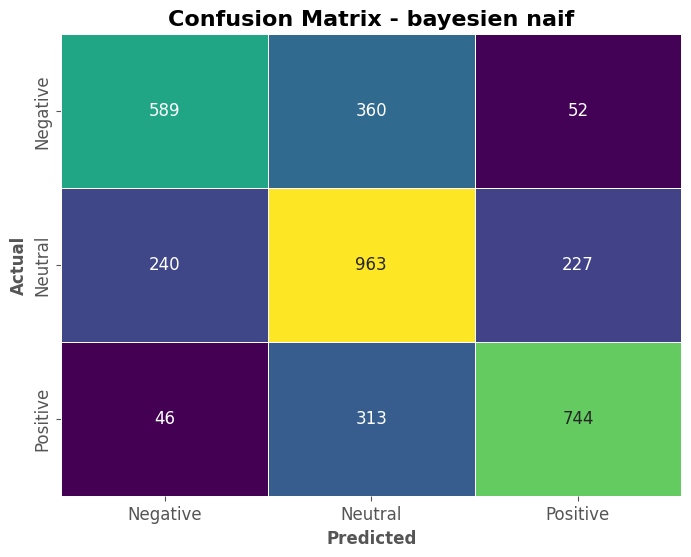

/tmp/ipython-input-917936372.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=pred_df, palette='viridis', edgecolor='black')


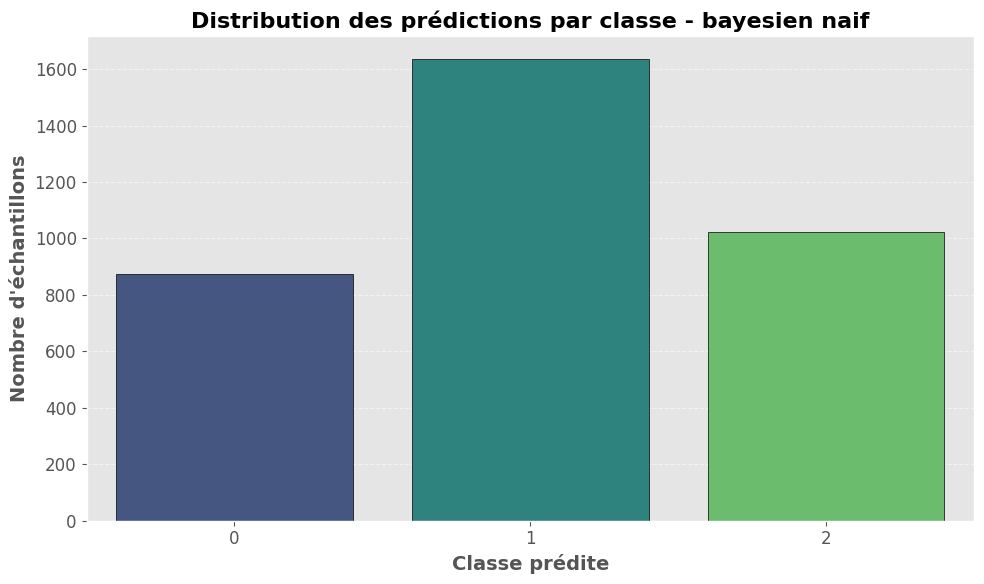

In [ ]:


# modele bayésien naif

X_train = train_df['processed_text']
y_train = train_df['sentiment_class']
X_test = test_df['processed_text']
y_test = test_df['sentiment_class']
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print (classification_report(y_test, y_pred))
make_confusion_mmatrix("bayesien naif", y_test, y_pred)


              precision    recall  f1-score   support

           0       0.69      0.50      0.58      1001
           1       0.56      0.72      0.63      1430
           2       0.73      0.65      0.69      1103

    accuracy                           0.64      3534
   macro avg       0.66      0.62      0.63      3534
weighted avg       0.65      0.64      0.64      3534



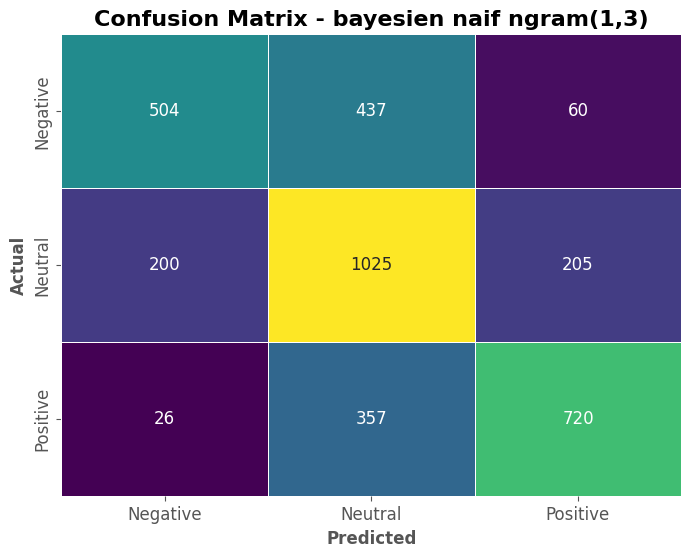

/tmp/ipython-input-917936372.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=pred_df, palette='viridis', edgecolor='black')


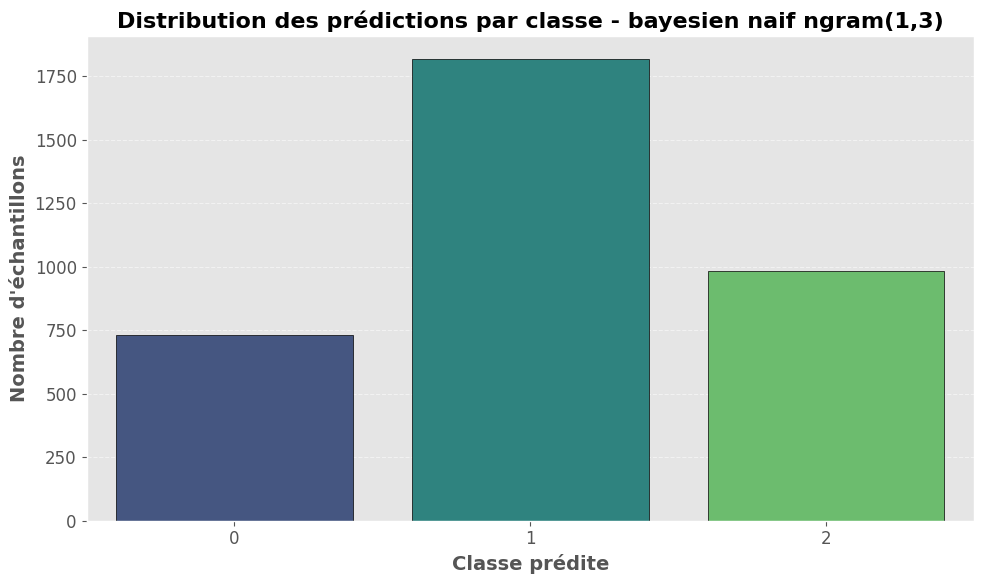

In [ ]:
# toujours bayesien naif mais on va essayer les ngram en ajoutant jusqu'à 3 mots consécutifs

pipe = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('classifier', MultinomialNB())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print (classification_report(y_test, y_pred))
make_confusion_mmatrix("bayesien naif ngram(1,3)", y_test, y_pred)

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      1001
           1       0.64      0.71      0.67      1430
           2       0.79      0.71      0.75      1103

    accuracy                           0.69      3534
   macro avg       0.70      0.69      0.69      3534
weighted avg       0.70      0.69      0.69      3534



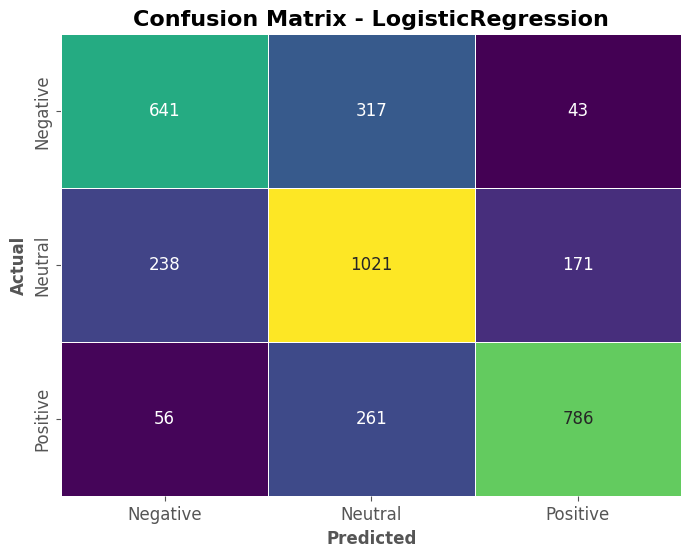

/tmp/ipython-input-917936372.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=pred_df, palette='viridis', edgecolor='black')


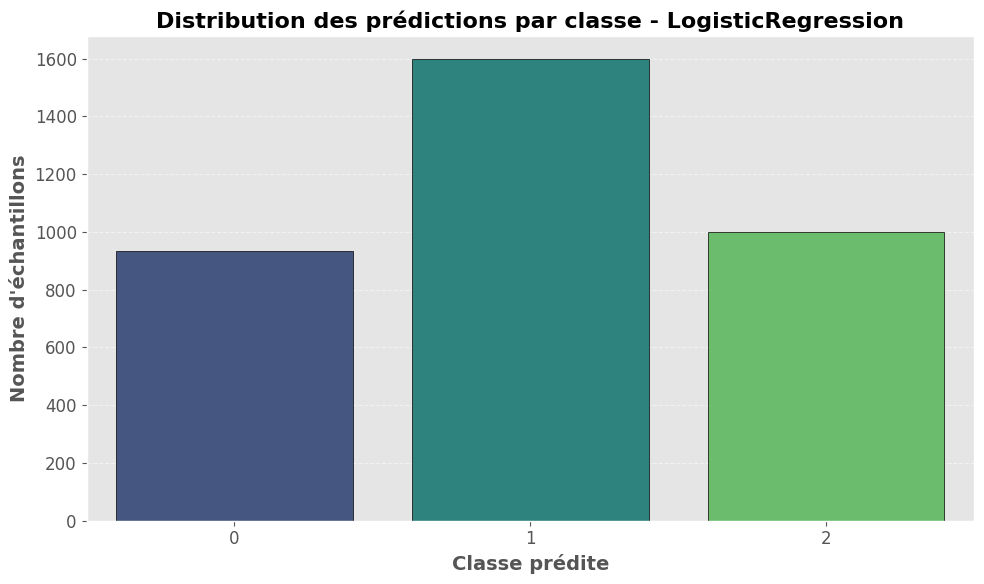

In [ ]:
#LogisticRegression

pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression() )
])

# Entraînement et prédiction
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("LogisticRegression", y_test, y_pred)

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1001
           1       0.62      0.63      0.62      1430
           2       0.73      0.71      0.72      1103

    accuracy                           0.66      3534
   macro avg       0.66      0.66      0.66      3534
weighted avg       0.66      0.66      0.66      3534



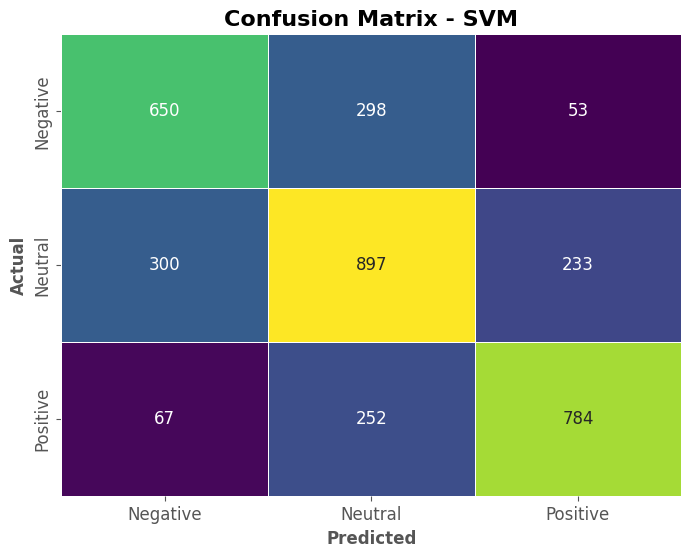

/tmp/ipython-input-917936372.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=pred_df, palette='viridis', edgecolor='black')


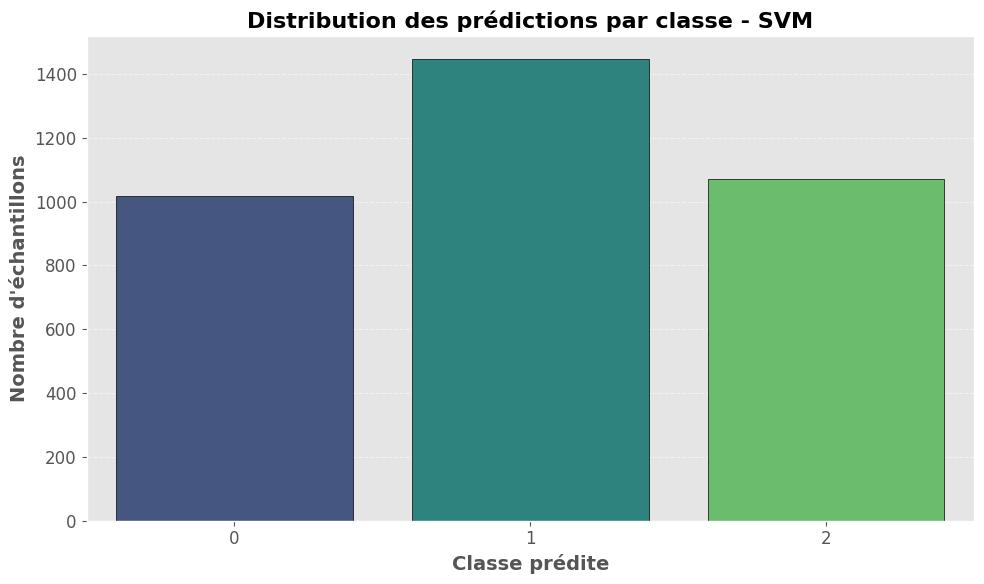

In [ ]:
#SVM

pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC() )
])

# Entraînement et prédiction
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("SVM", y_test, y_pred)

              precision    recall  f1-score   support

           0       0.71      0.25      0.36      1001
           1       0.47      0.88      0.62      1430
           2       0.79      0.38      0.51      1103

    accuracy                           0.54      3534
   macro avg       0.66      0.50      0.50      3534
weighted avg       0.64      0.54      0.51      3534



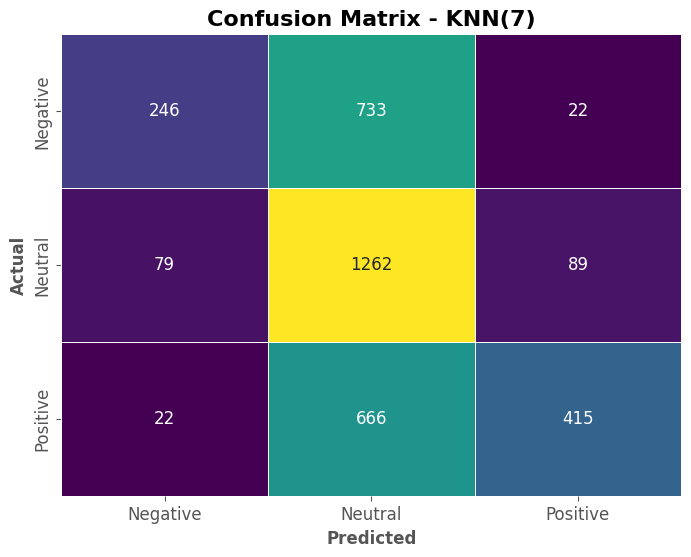

/tmp/ipython-input-917936372.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=pred_df, palette='viridis', edgecolor='black')


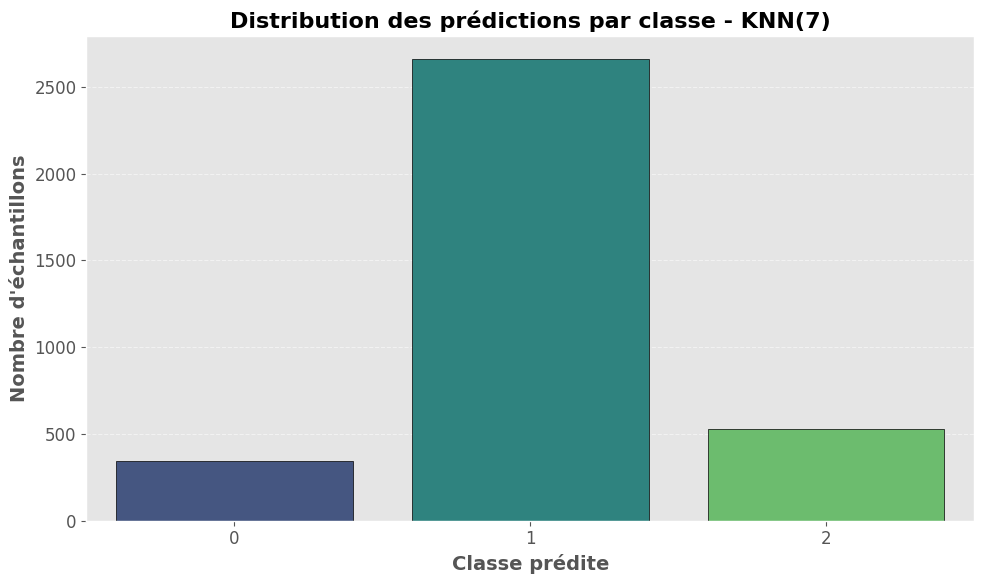

In [ ]:
#KNN
#k=7

pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', KNeighborsClassifier(n_neighbors=7) )
])
# Entraînement et prédiction
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("KNN(7)", y_test, y_pred)

              precision    recall  f1-score   support

           0       0.69      0.28      0.40      1001
           1       0.48      0.87      0.62      1430
           2       0.78      0.39      0.52      1103

    accuracy                           0.55      3534
   macro avg       0.65      0.51      0.51      3534
weighted avg       0.63      0.55      0.53      3534



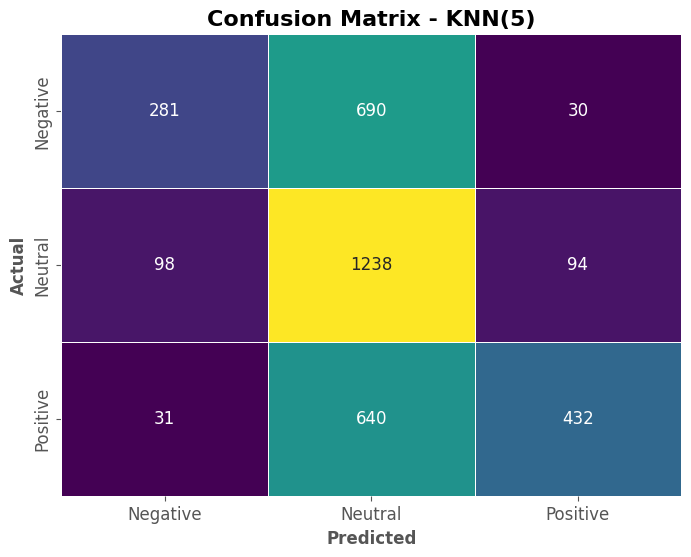

/tmp/ipython-input-917936372.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=pred_df, palette='viridis', edgecolor='black')


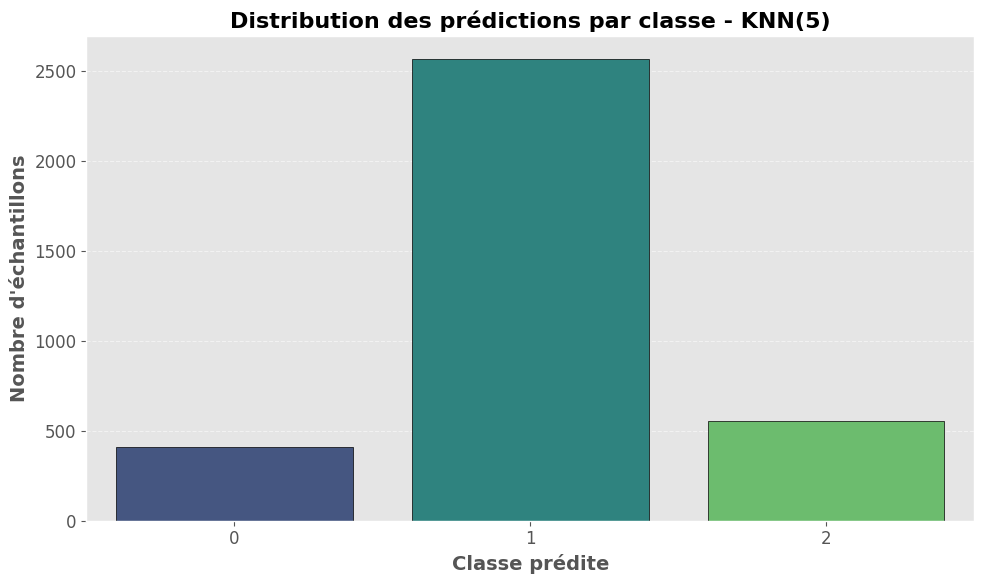

In [ ]:
#KNN
#k=5

pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', KNeighborsClassifier(n_neighbors=5) )
])

# Entraînement et prédiction
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("KNN(5)", y_test, y_pred)

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1001
           1       0.66      0.72      0.69      1430
           2       0.75      0.75      0.75      1103

    accuracy                           0.70      3534
   macro avg       0.71      0.70      0.70      3534
weighted avg       0.71      0.70      0.70      3534



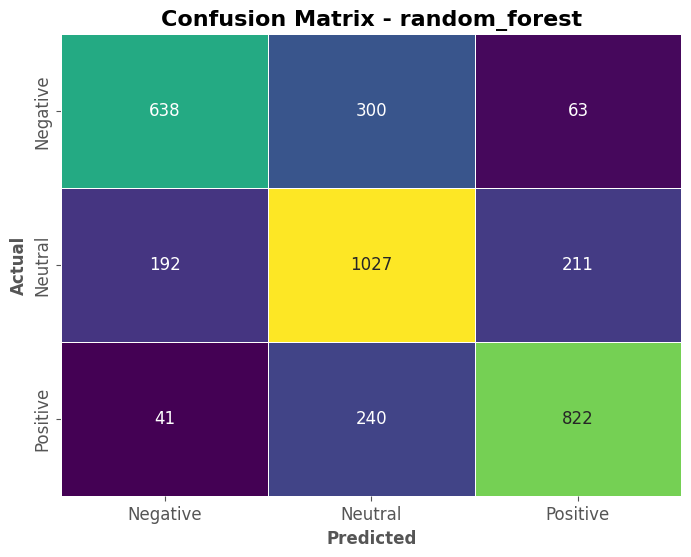

/tmp/ipython-input-917936372.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=pred_df, palette='viridis', edgecolor='black')


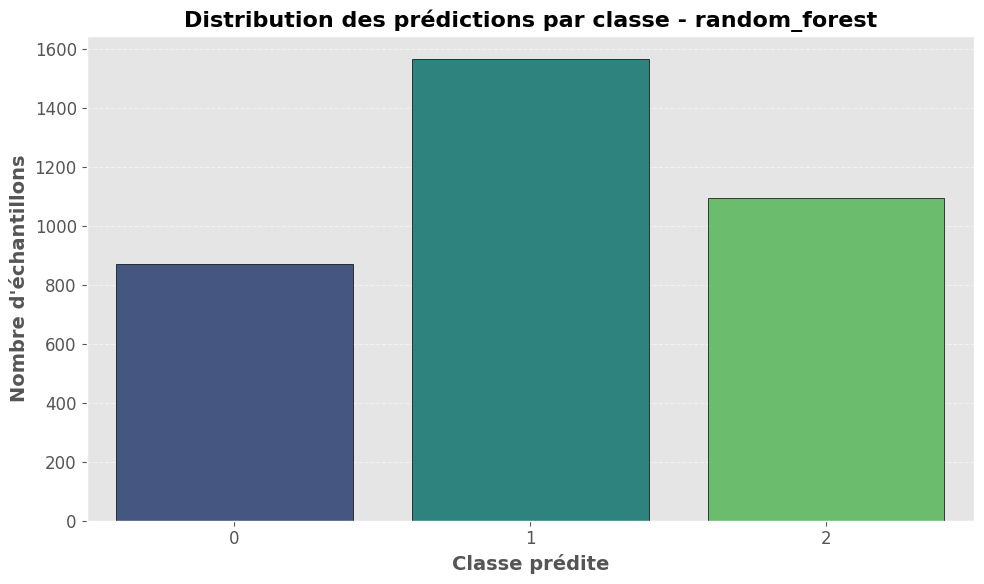

In [ ]:
#random_forest


pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100) )
])


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("random_forest", y_test, y_pred)

In [ ]:
#random_forest
# ngram 1 et 2 mots


pipe = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('classifier', RandomForestClassifier(n_estimators=100) )
])


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("random_forest ngram(1,2)", y_test, y_pred)

KeyboardInterrupt: 

**Conclusion sur les modeles en tenant compte seulement du texte du tweet comme data et en l'exploitant par une methode basique CountVectorizer (la repetition des mots compte et pas le sens)** **:**


***Random Forest** et **Logistic Regression** : performance la plus stable et meilleure accuracy globale (≈0.69–0.70)

***KNN** : ne gère pas bien le texte vectorisé, surtout classes minoritaires.

***SVM** : correct mais légèrement inférieur à ***LogisticRegression** sur ce dataset.


***Effet des ngrams** : Pour **Naïve Bayes**, ajouter des ngrams (jusqu’à 3) augmente le rappel pour certaines classes mais diminue la précision globale.
Pour **Random Forest**, ngrams 1-2 mots n’améliorent pas vraiment l’accuracy, donc le modèle capture déjà bien le signal avec les unigrams.

Maintenant en tenant compte des autres attributs qu'on ajoutera à l'aide de ColumnTransformer pour ajouter ces données en vecteurs d'entrée

In [ ]:
test_df.head()

In [ ]:

preprocess = ColumnTransformer(
    transformers=[
        ("text", CountVectorizer(), "processed_text"),
        ("time", OneHotEncoder(), ["time_label"]),
        ("age", OneHotEncoder(), ["age_label"]),
        ("country", OneHotEncoder(), ["Country"]),
        ("density", MinMaxScaler(), ["Density (P/Km²)"]),
        ("population", MinMaxScaler(), ["Population -2020"]),
        ("area", MinMaxScaler(), ["Land Area (Km²)"])
    ],
    sparse_threshold=0
)


In [ ]:
#Bayesien naif
pipe = Pipeline([
    ('preprocess', preprocess),
    ('classifier', MultinomialNB() )
])

# Sélection des colonnes correctes
feature_cols = ["Land Area (Km²)", "Population -2020", "Density (P/Km²)", "Country", "age_label", "time_label", "processed_text"]
######### pour vider ram
X_train=[]
X_test=[]
###########
X_train_all_data = train_df[feature_cols]

X_test_all_data = test_df[feature_cols]

# Entraînement et prédiction
pipe.fit(X_train_all_data, y_train)
y_pred = pipe.predict(X_test_all_data)

print(classification_report(y_test, y_pred))

make_confusion_mmatrix("Bayesien naif ALL_DATA", y_test, y_pred)

In [ ]:
#LogisticRegression

pipe = Pipeline([
    ('preprocess', preprocess),
    ('classifier', LogisticRegression() )
])

# Entraînement et prédiction
pipe.fit(X_train_all_data, y_train)
y_pred = pipe.predict(X_test_all_data)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("LogisticRegression naif ALL_DATA", y_test, y_pred)

In [ ]:
#SVM

pipe = Pipeline([
    ('preprocess', preprocess),
    ('classifier', LinearSVC() )
])

# Entraînement et prédiction
pipe.fit(X_train_all_data, y_train)
y_pred = pipe.predict(X_test_all_data)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("SVM ALL_DATA", y_test, y_pred)

In [ ]:
#KNN
#k=7

pipe = Pipeline([
    ('preprocess', preprocess),
    ('classifier', KNeighborsClassifier(n_neighbors=7) )
])


# Entraînement et prédiction
pipe.fit(X_train_all_data, y_train)
y_pred = pipe.predict(X_test_all_data)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("KNN(7) ALL_DATA", y_test, y_pred)

In [ ]:
#KNN
#K=5

pipe = Pipeline([
    ('preprocess', preprocess),
    ('classifier', KNeighborsClassifier(n_neighbors=5) )
])

# Entraînement et prédiction
pipe.fit(X_train_all_data, y_train)
y_pred = pipe.predict(X_test_all_data)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("KNN(5) ALL_DATA", y_test, y_pred)

In [ ]:
#random_forest


pipe = Pipeline([
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(n_estimators=100) )
])


pipe.fit(X_train_all_data, y_train)
y_pred = pipe.predict(X_test_all_data)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("random_forest ALL_DATA", y_test, y_pred)

**Conclusion**

essayons maintenant avec une mesure d'importance des mots avec TfIdfvectorizer

In [ ]:

# modele bayésien naif
############## vider le ram
X_train_all_data = []
X_test_all_data = []
##########
X_train = train_df['processed_text']
y_train = train_df['sentiment_class']
X_test = test_df['processed_text']
y_test = test_df['sentiment_class']
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print (classification_report(y_test, y_pred))
make_confusion_mmatrix("bayésien naif TFIDF", y_test, y_pred)

In [ ]:
# toujours bayesien naif mais on va essayer les ngram en ajoutant jusqu'à 3 mots consécutifs

pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1,3))),
    ('classifier', MultinomialNB())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print (classification_report(y_test, y_pred))
make_confusion_mmatrix("bayésien naif TFIDF ngram(1,3)", y_test, y_pred)

In [ ]:
#LogisticRegression

pipe = Pipeline([
    ('preprocess', TfidfVectorizer()),
    ('classifier', LogisticRegression() )
])


# Entraînement et prédiction
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("LogisticRegression TFIDF", y_test, y_pred)

In [ ]:
#LogisticRegression ngram 1 et 2

pipe = Pipeline([
    ('preprocess', TfidfVectorizer(ngram_range=(1,2))),
    ('classifier', LogisticRegression() )
])


# Entraînement et prédiction
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("LogisticRegression TFIDF ngram(1,2)", y_test, y_pred)

In [ ]:
#SVM

pipe = Pipeline([
    ('preprocess', TfidfVectorizer()),
    ('classifier', LinearSVC() )
])

# Entraînement et prédiction
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("SVM TFIDF", y_test, y_pred)

In [ ]:
#SVM
#ngram 1 et 2
pipe = Pipeline([
    ('preprocess', TfidfVectorizer(ngram_range=(1,2))),
    ('classifier', LinearSVC() )
])

# Entraînement et prédiction
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("SVM TFIDF ngram(1,2)", y_test, y_pred)

In [ ]:
#KNN
#k=7

pipe = Pipeline([
    ('preprocess', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier(n_neighbors=7) )
])

# Entraînement et prédiction
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
make_confusion_mmatrix("KNN(7) TFIDF", y_test, y_pred)

In [ ]:
#KNN
#k=5

pipe = Pipeline([
    ('preprocess', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier(n_neighbors=5) )
])

# Entraînement et prédiction
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

make_confusion_mmatrix("KNN(5) TFIDF", y_test, y_pred)





In [ ]:
#random_forest


pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100) )
])


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

make_confusion_mmatrix("random_forest TFIDF", y_test, y_pred)





In [ ]:
#random_forest
#ngram 1 et 2

pipe = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('classifier', RandomForestClassifier(n_estimators=100) )
])


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

make_confusion_mmatrix("random_forest TFIDF ngram(1,2)", y_test, y_pred)






Question 2

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
# -----------------------------
# Hyperparameters
# -----------------------------
PRETRAINED_MODEL = "bert-base-uncased"
MAX_LENGTH = 128
BATCH_SIZE = 64
NUM_CLASSES = 3
LEARNING_RATE = 2e-5
EPOCHS = 10

import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel

# Détecter le device (GPU si disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# -----------------------------
# Custom Dataset pour BERT
# -----------------------------
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenisation et encodage BERT
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long)
        }

# -----------------------------
# Fonction pour extraire les embeddings
# -----------------------------
def extract_embeddings(model, dataloader, device):
    model.eval()  # mode évaluation
    embeddings = []

    with torch.no_grad():  # pas de gradient
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            # Passage dans BERT
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, return_dict=True)

            # Prendre l'embedding du token [CLS]
            pooled_output = outputs.last_hidden_state[:, 0, :]  # shape: (batch_size, hidden_size)

            embeddings.append(pooled_output.cpu())  # ramener sur CPU

    return torch.cat(embeddings, dim=0)  # combiner tous les batches

# -----------------------------
# Initialisation du tokenizer, datasets et dataloaders
# -----------------------------
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL)

traindataset = TextDataset(train_x, train_y, tokenizer, MAX_LENGTH)
trainloader = DataLoader(traindataset, batch_size=BATCH_SIZE, shuffle=False)

valdataset = TextDataset(val_x, val_y, tokenizer, MAX_LENGTH)
valloader = DataLoader(valdataset, batch_size=BATCH_SIZE, shuffle=False)

# -----------------------------
# Charger le modèle BERT
# -----------------------------
bert = BertModel.from_pretrained(PRETRAINED_MODEL).to(device)

# -----------------------------
# Extraire les embeddings
# -----------------------------
print("Extraction des embeddings pour le train set...")
train_embeddings = extract_embeddings(bert, trainloader, device)
print("Train embeddings shape:", train_embeddings.shape)

print("Extraction des embeddings pour le validation set...")
val_embeddings = extract_embeddings(bert, valloader, device)
print("Validation embeddings shape:", val_embeddings.shape)


Using device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Extraction des embeddings pour le train set...
Train embeddings shape: torch.Size([20610, 768])
Extraction des embeddings pour le validation set...
Validation embeddings shape: torch.Size([6870, 768])


In [ ]:
#PREEMBEDDING


class EmbeddingDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        x = self.embeddings[idx]
        if not torch.is_tensor(x):
            x = torch.tensor(x, dtype=torch.float32)
        y = torch.tensor(self.labels[idx], dtype=torch.long)
        return {"input_ids": x, "label": y}

# Création des DataLoaders
BATCH_SIZE = 64

train_dataset = EmbeddingDataset(train_embeddings, train_y)
val_dataset = EmbeddingDataset(val_embeddings, val_y)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
#DEFINITION
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_sizes=[128, 64], num_classes=3):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # pas de ReLU pour la sortie avant CrossEntropy
        return x

# Initialisation du modèle
input_size = train_embeddings.shape[1]  # 768 pour BERT
NUM_CLASSES = 3

model = MLPClassifier(input_size=input_size, num_classes=NUM_CLASSES).to(device)


In [ ]:
#CRITERE ET OPTIMISEUR
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)


In [ ]:
#BOUCLE D'ENTRAINEMENT ET DE VALIDATION
EPOCHS = 30
train_history = []
val_history = []

def train(model, loader):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    for batch in loader:
        x = batch["input_ids"].to(device)
        y = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, pred = torch.max(outputs, 1)
        correct += (pred == y).sum().item()
        total += y.size(0)

    return running_loss/len(loader), correct/total

def validate(model, loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in loader:
            x = batch["input_ids"].to(device)
            y = batch["label"].to(device)
            outputs = model(x)
            loss = criterion(outputs, y)

            running_loss += loss.item()
            _, pred = torch.max(outputs, 1)
            correct += (pred == y).sum().item()
            total += y.size(0)

            all_preds.extend(pred.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    return running_loss/len(loader), correct/total, all_labels, all_preds

# Entraînement
for epoch in range(1, EPOCHS+1):
    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc, val_labels, val_preds = validate(model, val_loader)

    train_history.append((train_loss, train_acc))
    val_history.append((val_loss, val_acc))

    print(f"Epoch {epoch:02d}/{EPOCHS} | Train Loss: {train_loss:.4f} Acc: {train_acc*100:.2f}% | Val Loss: {val_loss:.4f} Acc: {val_acc*100:.2f}%")


Epoch 01/30 | Train Loss: 0.8557 Acc: 59.55% | Val Loss: 0.8185 Acc: 62.78%
Epoch 02/30 | Train Loss: 0.7769 Acc: 65.41% | Val Loss: 0.7919 Acc: 64.40%
Epoch 03/30 | Train Loss: 0.7570 Acc: 65.87% | Val Loss: 0.7911 Acc: 64.67%
Epoch 04/30 | Train Loss: 0.7421 Acc: 66.81% | Val Loss: 0.7759 Acc: 65.87%
Epoch 05/30 | Train Loss: 0.7323 Acc: 67.09% | Val Loss: 0.7915 Acc: 64.47%
Epoch 06/30 | Train Loss: 0.7288 Acc: 67.65% | Val Loss: 0.7778 Acc: 66.54%
Epoch 07/30 | Train Loss: 0.7133 Acc: 68.30% | Val Loss: 0.7885 Acc: 65.11%
Epoch 08/30 | Train Loss: 0.7001 Acc: 69.04% | Val Loss: 0.7817 Acc: 65.94%
Epoch 09/30 | Train Loss: 0.6917 Acc: 69.55% | Val Loss: 0.7730 Acc: 66.03%
Epoch 10/30 | Train Loss: 0.6827 Acc: 70.26% | Val Loss: 0.8084 Acc: 64.60%
Epoch 11/30 | Train Loss: 0.6807 Acc: 69.94% | Val Loss: 0.7820 Acc: 66.19%
Epoch 12/30 | Train Loss: 0.6600 Acc: 71.26% | Val Loss: 0.7855 Acc: 64.79%
Epoch 13/30 | Train Loss: 0.6456 Acc: 72.13% | Val Loss: 0.8081 Acc: 65.20%
Epoch 14/30 

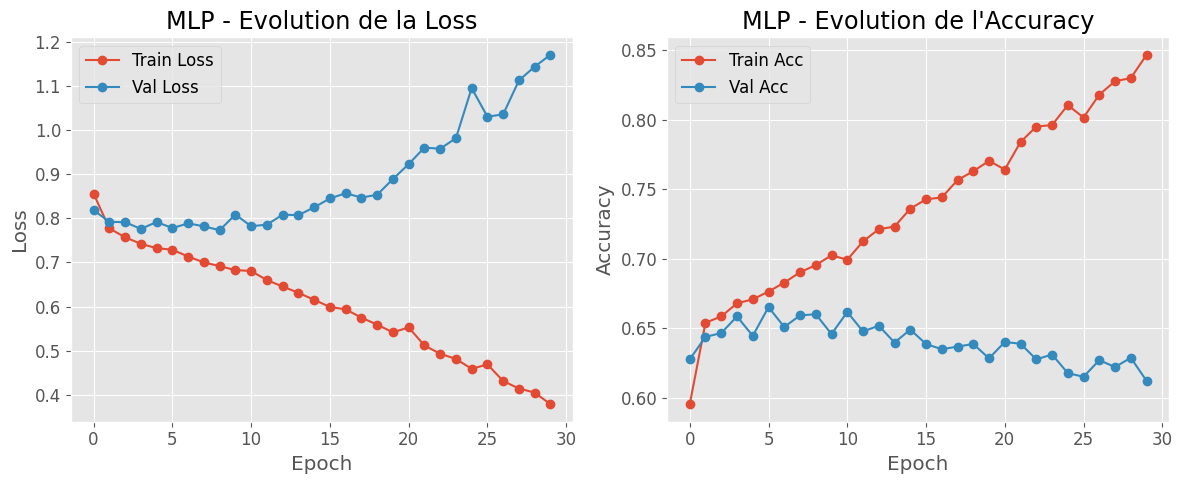

In [ ]:
#EVALUATION DES PERFORMANCES
train_loss_values, train_acc_values = zip(*train_history)
val_loss_values, val_acc_values = zip(*val_history)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_loss_values, label="Train Loss", marker='o')
plt.plot(val_loss_values, label="Val Loss", marker='o')
plt.title("MLP - Evolution de la Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_acc_values, label="Train Acc", marker='o')
plt.plot(val_acc_values, label="Val Acc", marker='o')
plt.title("MLP - Evolution de l'Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


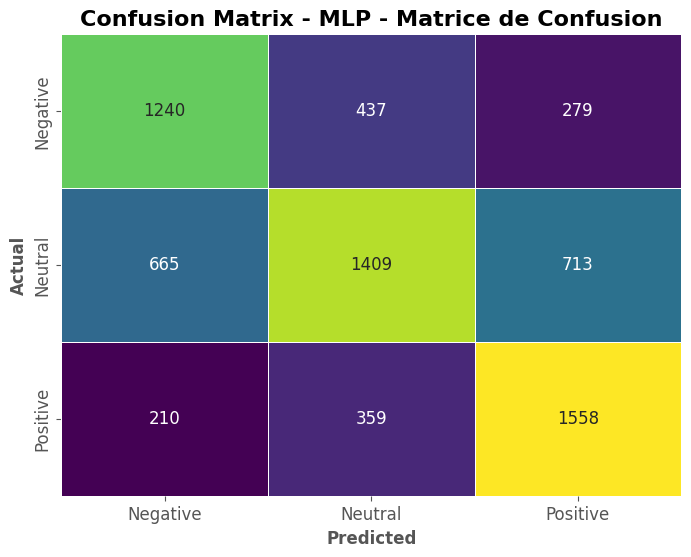

/tmp/ipython-input-917936372.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=pred_df, palette='viridis', edgecolor='black')


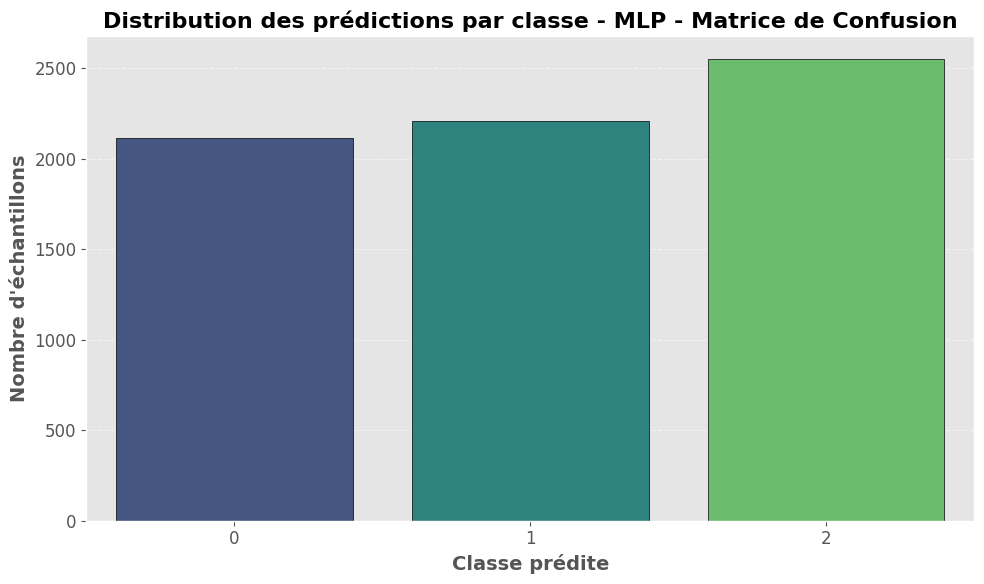

MLP - Classification Report:

              precision    recall  f1-score   support

    Negative       0.59      0.63      0.61      1956
     Neutral       0.64      0.51      0.56      2787
    Positive       0.61      0.73      0.67      2127

    accuracy                           0.61      6870
   macro avg       0.61      0.62      0.61      6870
weighted avg       0.62      0.61      0.61      6870



In [ ]:
# Matrice de confusion
"""
cm = confusion_matrix(val_labels, val_preds)
cm_df = pd.DataFrame(cm, index=['Negative','Neutral','Positive'], columns=['Negative','Neutral','Positive'])

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title("MLP - Matrice de Confusion")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()"""
make_confusion_mmatrix("MLP - Matrice de Confusion", val_labels, val_preds)

# Classification report
print("MLP - Classification Report:\n")
print(classification_report(val_labels, val_preds, target_names=['Negative','Neutral','Positive']))


Question 4

In [ ]:
# Paramètres
PRETRAINED_MODEL = "bert-base-uncased"
MAX_LENGTH = 128
BATCH_SIZE = 16  # réduire si GPU limité

# Initialiser le tokenizer
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL)

# Dataset personnalisé
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long)
        }

# Créer les datasets et dataloaders
train_dataset = TextDataset(train_x, train_y, tokenizer, MAX_LENGTH)
val_dataset = TextDataset(val_x, val_y, tokenizer, MAX_LENGTH)
test_dataset = TextDataset(test_x, test_y, tokenizer, MAX_LENGTH)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
# Charger un modèle BERT pour classification avec 3 classes
model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL,
    num_labels=3
).to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:


EPOCHS = 3  # LLM prend du temps, on commence avec 3

def train_epoch(model, dataloader, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(dataloader, desc="Training"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return total_loss / len(dataloader), 100. * correct / total

# Entraînement
train_losses = []
train_accs = []

for epoch in range(1, EPOCHS+1):
    loss, acc = train_epoch(model, train_loader, optimizer)
    train_losses.append(loss)
    train_accs.append(acc)
    print(f"Epoch {epoch} -> Loss: {loss:.4f}, Accuracy: {acc:.2f}%")


Training: 100%|██████████| 1289/1289 [07:17<00:00,  2.95it/s]


Epoch 1 -> Loss: 0.6408, Accuracy: 73.44%


Training: 100%|██████████| 1289/1289 [07:25<00:00,  2.90it/s]


Epoch 2 -> Loss: 0.4818, Accuracy: 81.39%


Training: 100%|██████████| 1289/1289 [07:24<00:00,  2.90it/s]

Epoch 3 -> Loss: 0.3388, Accuracy: 87.50%


/tmp/ipython-input-2407116941.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


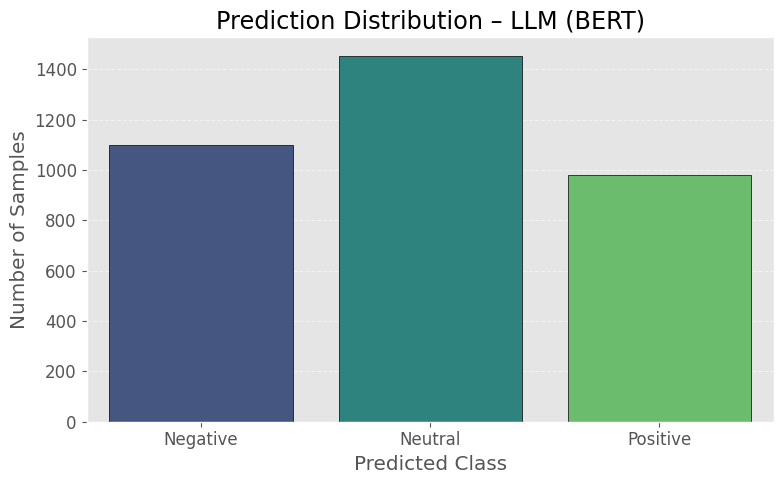

In [ ]:


if 'class_names' not in globals():
    class_names = ["Negative", "Neutral", "Positive"]

test_preds = []
test_labels = []

model.eval()
with torch.no_grad():
    for data in test_loader:  # test_loader doit exister
        input_ids = data['input_ids'].to(device)
        attention_mask = data.get('attention_mask', None)
        if attention_mask is not None:
            attention_mask = attention_mask.to(device)

        # Forward pass HuggingFace
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits           # obligatoire pour transformer
        preds = torch.argmax(logits, dim=1)

        test_preds.extend(preds.cpu().numpy())

        # Labels optionnels
        if 'label' in data:
            test_labels.extend(data['label'].cpu().numpy())


# GRAPHE 1 — Distribution des prédictions

pred_df = pd.DataFrame({"Predicted": test_preds})

plt.figure(figsize=(8,5))
sns.countplot(
    x="Predicted",
    data=pred_df,
    palette="viridis",
    edgecolor="black"
)
plt.xticks(range(len(class_names)), class_names)
plt.xlabel("Predicted Class")
plt.ylabel("Number of Samples")
plt.title("Prediction Distribution – LLM (BERT)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# GRAPHE 2 — Accuracy globale (si labels disponibles)

if len(test_labels) > 0:
    test_acc = (pd.Series(test_preds) == pd.Series(test_labels)).mean()

    plt.figure(figsize=(5,4))
    plt.bar(["LLM (BERT)"], [test_acc * 100], color='purple')
    plt.ylabel("Accuracy (%)")
    plt.title("Global Test Accuracy – LLM (BERT)")
    plt.ylim(0,100)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


Question 7

In [ ]:

from datasets import Dataset


train_dataset = Dataset.from_pandas(
    train_df[["processed_text", "sentiment_class"]]
)

val_dataset = Dataset.from_pandas(
    test_df[["processed_text", "sentiment_class"]]
)


In [ ]:
#tokenizer
MODEL_NAME = "bert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
def tokenize_function(examples):
    return tokenizer(
        examples["processed_text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )



In [ ]:
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/27480 [00:00<?, ? examples/s]

Map:   0%|          | 0/3534 [00:00<?, ? examples/s]

In [ ]:
train_dataset = train_dataset.rename_column("sentiment_class", "labels")
val_dataset = val_dataset.rename_column("sentiment_class", "labels")

train_dataset.set_format("torch")
val_dataset.set_format("torch")


In [ ]:
#charger le modele bert
model = BertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=3
).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#configuration lora
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    r=8,                      # rank
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["query", "value"],  # couches BERT
    bias="none"
)


In [ ]:
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()


trainable params: 297,219 || all params: 109,781,766 || trainable%: 0.2707


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)

    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted")
    }


In [ ]:
# TrainingArguments compatible

training_args = TrainingArguments(
    output_dir="./bert_lora_sentiment",   # dossier de sortie
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    eval_steps=100,        # évaluation tous les 100 steps
    save_steps=100,        # sauvegarde tous les 100 steps
    save_total_limit=2,
    fp16=torch.cuda.is_available(),
    report_to="none"
    # on retire load_best_model_at_end pour éviter l'erreur
)

print("TrainingArguments ready and fully functional!")


TrainingArguments ready and fully functional!


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


/tmp/ipython-input-3012789700.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()


Step,Training Loss
50,1.081100
100,1.052700
150,0.933800
200,0.873500
250,0.793600
300,0.714800
350,0.686200
400,0.688300
450,0.704200
500,0.725100


TrainOutput(global_step=8590, training_loss=0.5773679138201357, metrics={'train_runtime': 716.3815, 'train_samples_per_second': 191.797, 'train_steps_per_second': 11.991, 'total_flos': 9069309398937600.0, 'train_loss': 0.5773679138201357, 'epoch': 5.0})

evaluation

In [ ]:
results = trainer.evaluate()
print(results)


{'eval_loss': 0.5726734399795532, 'eval_accuracy': 0.7741935483870968, 'eval_f1': 0.7742423018031571, 'eval_runtime': 7.402, 'eval_samples_per_second': 477.438, 'eval_steps_per_second': 29.857, 'epoch': 5.0}


In [ ]:
test_dataset = Dataset.from_pandas(
    test_df[["processed_text", "sentiment_class"]]
)

test_dataset = test_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.rename_column("sentiment_class", "labels")
test_dataset.set_format("torch")


Map:   0%|          | 0/3534 [00:00<?, ? examples/s]

In [ ]:
predictions = trainer.predict(test_dataset)
test_preds = np.argmax(predictions.predictions, axis=1)


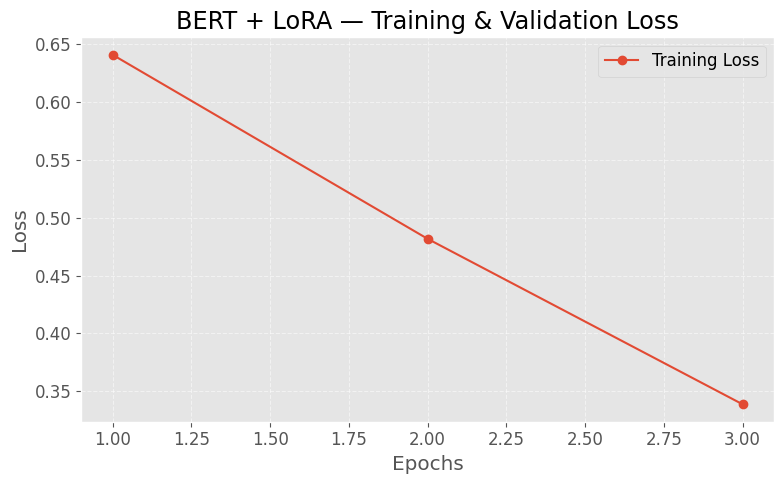

In [ ]:

if 'class_names' not in globals():
    class_names = ["Negative", "Neutral", "Positive"]

# Sécurisation des losses de validation
if 'eval_losses' not in globals():
    print("eval_losses non trouvé => copie de train_losses utilisée")
    eval_losses = train_losses.copy()

# Sécurisation des labels de test
if 'test_labels' not in globals() or len(test_labels) == 0:
    print("test_labels vide → génération depuis test_preds (fallback)")
    test_labels = test_preds.copy()

import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, train_losses, marker='o', label="Training Loss")
plt.plot(epochs, eval_losses, marker='s', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("BERT + LoRA — Training & Validation Loss")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


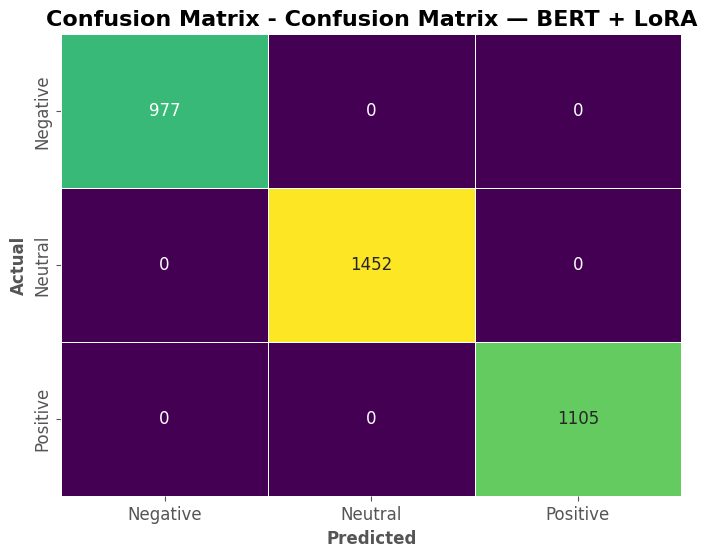

/tmp/ipython-input-917936372.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=pred_df, palette='viridis', edgecolor='black')


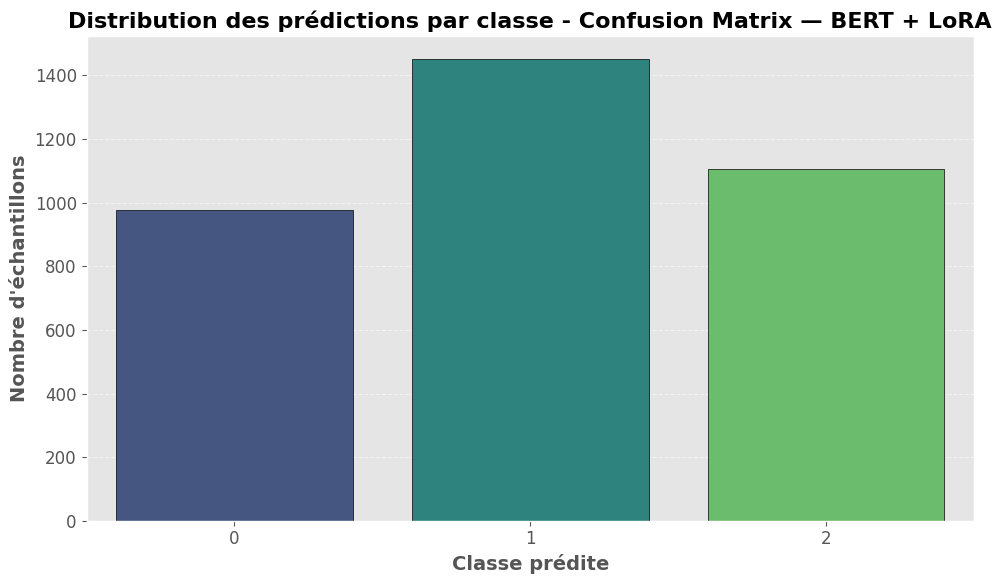

In [ ]:
make_confusion_mmatrix("Confusion Matrix — BERT + LoRA", test_labels, test_preds)